In [2]:
# Import libraries
import pandas as pd

# Load the Excel file
file_path = "250401 Leng Survey. Full download. MASTER VERSION WITHOUT LIST OF ORGS WORKED FOR.xlsx"
sheet_name = "All responses"

try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Successfully loaded Excel file with {len(df)} rows.")
except Exception as e:
    print(f"Error loading Excel file: {str(e)}")

# Since there might be duplicate column names, we'll use column positions
col2 = df.columns[1]  # Second column (index 1)
col3 = df.columns[2]  # Third column (index 2)
col4 = df.columns[3]  # Fourth column (index 3)
col5 = df.columns[4]  # Fifth column (index 4)

print(f"\nProcessing these columns:")
print(f"Column 2: {col2}")
print(f"Column 3: {col3}")
print(f"Column 4: {col4}")
print(f"Column 5: {col5}")

# Create new columns with descriptive names for regrouped categories
df['Job_Roles_PA_Survey'] = df[col2].copy()
df['Job_Roles_AA_Survey'] = df[col3].copy()
df['Healthcare_Settings_PA_Survey'] = df[col4].copy()
df['Healthcare_Settings_AA_Survey'] = df[col5].copy()

# Define valid options for Column 2 (job roles for PA survey)
valid_options_col2 = [
    "Resident doctor, including foundation years",
    "Consultant",
    "Physician associate",
    "GP (including GP speciality trainees)",
    "Specialty and associate specialist doctor"
]

# Define valid options for Column 3 (job roles for AA survey)
valid_options_col3 = [
    "Resident doctor, including foundation years",
    "Consultant",
    "Anaesthetist",
    "Anaesthesia associate",
    "Specialty and associate specialist doctor"
]

# Define valid options for Column 4 (healthcare settings for PA survey)
valid_options_col4 = [
    "Primary care",
    "Secondary care",
    "Mental health trust"
]

# Define valid options for Column 5 (healthcare settings for AA survey)
valid_options_col5 = ["Secondary care"]

# Helper function to apply regrouping logic
def regroup(value, valid_options):
    if pd.isna(value):
        return pd.NA  # Keep NaN values as missing
    return value if value in valid_options else "Other"

# Apply regrouping to each column
df['Job_Roles_PA_Survey'] = df[col2].apply(lambda x: regroup(x, valid_options_col2))
df['Job_Roles_AA_Survey'] = df[col3].apply(lambda x: regroup(x, valid_options_col3))
df['Healthcare_Settings_PA_Survey'] = df[col4].apply(lambda x: regroup(x, valid_options_col4))
df['Healthcare_Settings_AA_Survey'] = df[col5].apply(lambda x: regroup(x, valid_options_col5))

# Print summary of the regrouping
print("\nRegrouping summary:")
for col_name, col_data in [
    ("Job_Roles_PA_Survey", df['Job_Roles_PA_Survey']), 
    ("Job_Roles_AA_Survey", df['Job_Roles_AA_Survey']),
    ("Healthcare_Settings_PA_Survey", df['Healthcare_Settings_PA_Survey']), 
    ("Healthcare_Settings_AA_Survey", df['Healthcare_Settings_AA_Survey'])
]:
    value_counts = col_data.value_counts(dropna=False)
    print(f"\n{col_name} value counts:")
    print(value_counts)
    
    # Also print the count of missing values
    missing_count = col_data.isna().sum()
    if missing_count > 0:
        print(f"Missing values: {missing_count}")

# Optionally save the modified dataframe to a new Excel file
try:
    df.to_excel("250401 Leng Survey - Regrouped.xlsx", index=False)
    print("\nAll done! Results saved to 250401 Leng Survey - Regrouped.xlsx")
except Exception as e:
    print(f"\nError saving Excel file: {str(e)}")

# The DataFrame 'df' is now available for further analysis in the notebook

Successfully loaded Excel file with 8558 rows.

Processing these columns:
Column 2: Do you work (currently or previously) as one of the following?
Column 3: Do you work (currently or previously) as one of the following?.1
Column 4: In which healthcare setting do you work?
Column 5: In which healthcare setting do you work?.1

Regrouping summary:

Job_Roles_PA_Survey value counts:
Job_Roles_PA_Survey
Resident doctor, including foundation years    2590
<NA>                                           1687
Consultant                                     1177
Physician associate                            1141
GP (including GP speciality trainees)           888
Other                                           784
Specialty and associate specialist doctor       291
Name: count, dtype: int64
Missing values: 1687

Job_Roles_AA_Survey value counts:
Job_Roles_AA_Survey
<NA>                                           6844
Consultant                                      730
Resident doctor, including f

Survey choice column: Which survey would you like to complete?
Available survey choices: ['Physician associate survey' 'Anaesthesia associate survey']

Survey choice distribution:
Which survey would you like to complete?
Physician associate survey      6864
Anaesthesia associate survey    1694
Name: count, dtype: int64


PHYSICIAN ASSOCIATE SURVEY ANALYSIS
Total respondents: 6864

Physician Associate Survey - Job Roles:
---------------------------------------


,Count,Percentage (%)
"Resident doctor, including foundation years",2586,37.7
Consultant,1177,17.1
Physician associate,1141,16.6
GP (including GP speciality trainees),888,12.9
Other,783,11.4
Specialty and associate specialist doctor,289,4.2
Total Valid,6864,100.0


Missing responses: 0 (0.0% of Physician Associate Survey respondents)

Physician Associate Survey - Healthcare Settings:
-------------------------------------------------


,Count,Percentage (%)
Secondary care,629,51.6
Primary care,537,44.1
Mental health trust,27,2.2
Other,26,2.1
Total Valid,1219,100.0


Missing responses: 5645 (82.2% of Physician Associate Survey respondents)


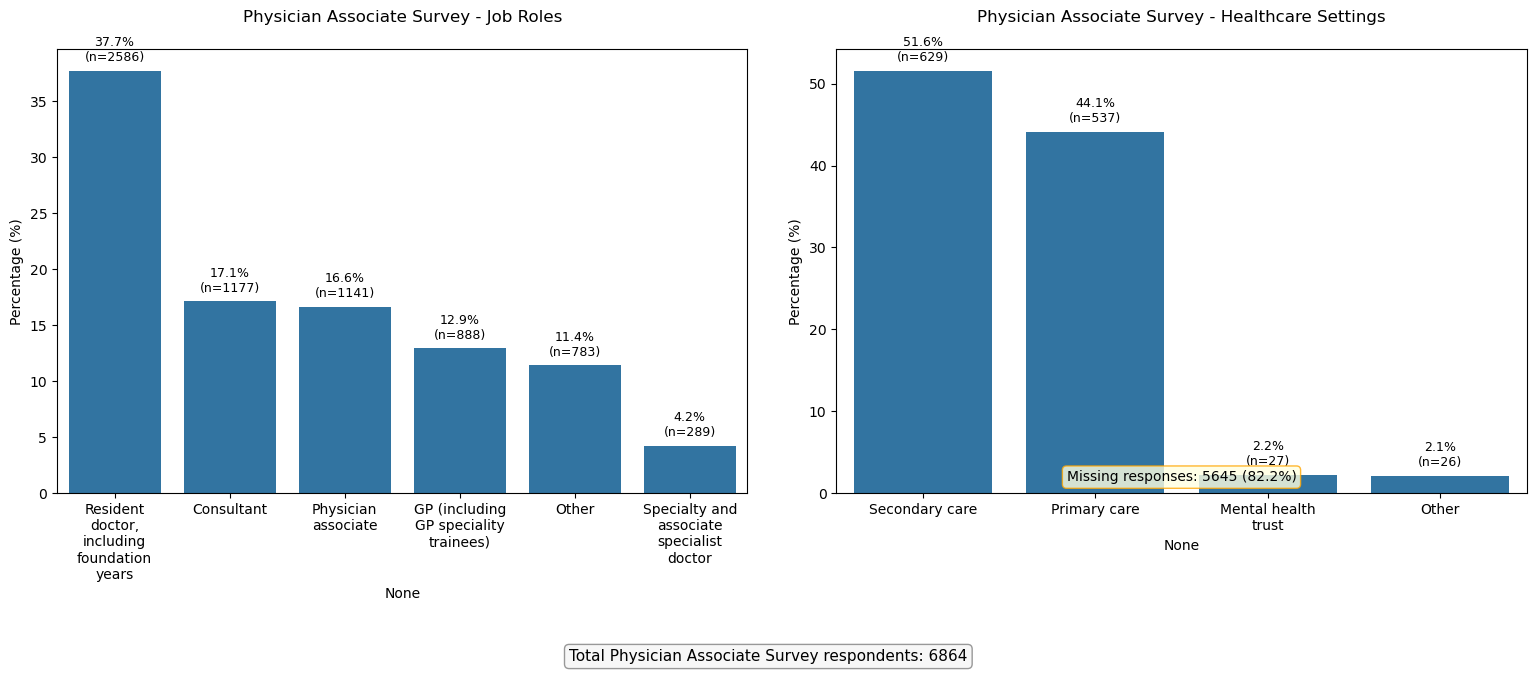



ANAESTHESIA ASSOCIATE SURVEY ANALYSIS
Total respondents: 1694

Anaesthesia Associate Survey - Job Roles:
-----------------------------------------


,Count,Percentage (%)
Consultant,726,42.9
"Resident doctor, including foundation years",376,22.2
Anaesthetist,229,13.5
Anaesthesia associate,131,7.7
Other,117,6.9
Specialty and associate specialist doctor,115,6.8
Total Valid,1694,100.0


Missing responses: 0 (0.0% of Anaesthesia Associate Survey respondents)

Anaesthesia Associate Survey - Healthcare Settings:
---------------------------------------------------


,Count,Percentage (%)
Secondary care,133,92.4
Other,11,7.6
Total Valid,144,100.0


Missing responses: 1550 (91.5% of Anaesthesia Associate Survey respondents)


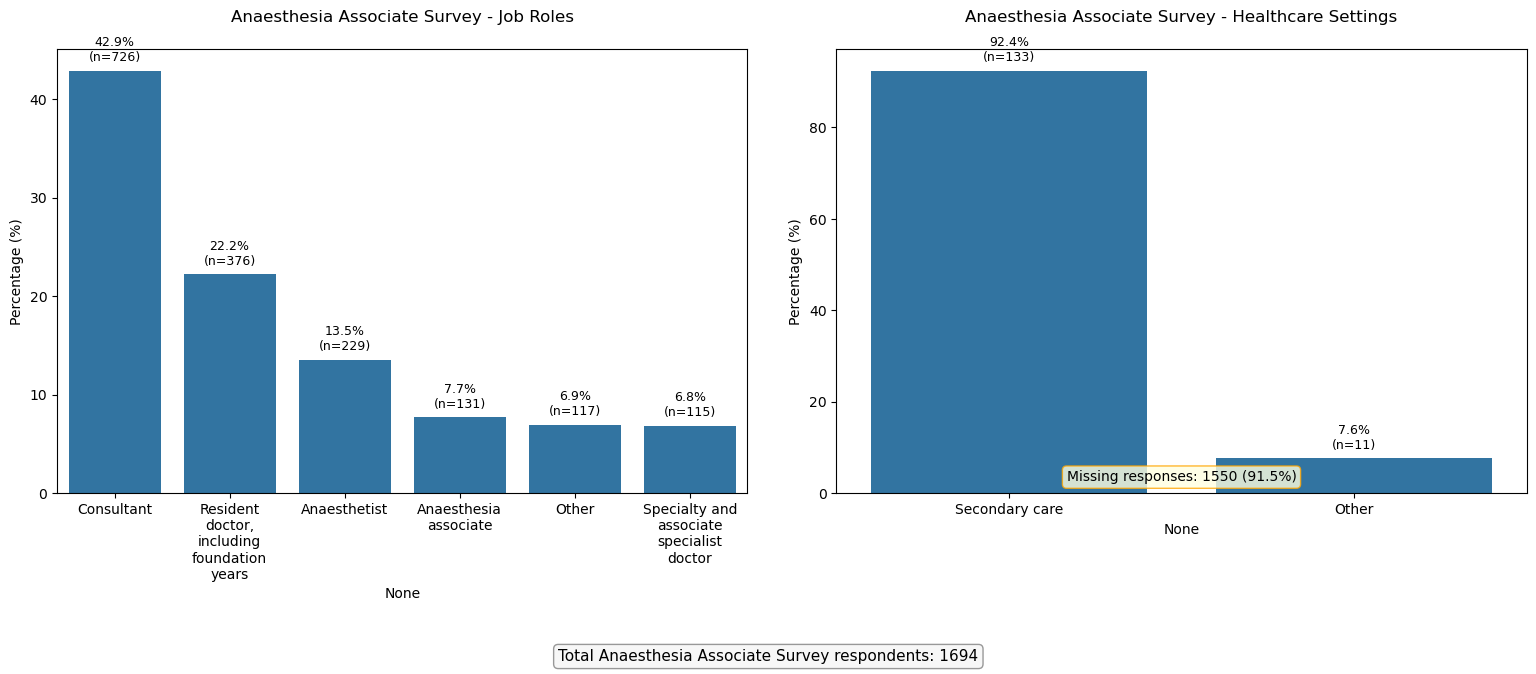

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

# Load the Excel file (assuming df is already loaded)
# If you need to reload it:
# file_path = "250401 Leng Survey. Full download. MASTER VERSION WITHOUT LIST OF ORGS WORKED FOR.xlsx"
# sheet_name = "All responses"
# df = pd.read_excel(file_path, sheet_name=sheet_name)

# Function to create descriptive statistics table
def create_stats_table(df, column_name):
    # Get value counts and percentages (excluding NaN values)
    counts = df[column_name].value_counts(dropna=True)
    total_valid = df[column_name].count()  # Count of non-NaN values
    total_respondents = len(df)
    percentages = (counts / total_valid * 100).round(1)
    
    # Create a stats DataFrame
    stats_df = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    })
    
    # Sort by count in descending order
    stats_df = stats_df.sort_values('Count', ascending=False)
    
    # Add a total valid responses row
    total_row = pd.DataFrame({
        'Count': [total_valid],
        'Percentage (%)': [100.0]
    }, index=['Total Valid'])
    
    stats_df = pd.concat([stats_df, total_row])
    
    # Calculate missing responses
    missing_count = total_respondents - total_valid
    missing_percent = (missing_count / total_respondents * 100).round(1) if total_respondents > 0 else 0
    
    return stats_df, missing_count, missing_percent

# Function to wrap text labels
def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(label, width=width)) for label in labels]

# Get the survey choice column (first column)
survey_column = df.columns[0]
print(f"Survey choice column: {survey_column}")

# Identify unique survey choices
survey_choices = df[survey_column].unique()
print(f"Available survey choices: {survey_choices}")

# Display values in the survey column to help identify the correct values
print("\nSurvey choice distribution:")
print(df[survey_column].value_counts())

# Define survey types based on the first column content
# Assuming "Physician associate survey" and "Anaesthesia associate survey" as values
pa_survey_value = "Physician associate survey"  # Update this if needed
aa_survey_value = "Anaesthesia associate survey"  # Update this if needed

# Create a function to generate analysis and visualizations by survey type
def analyze_by_survey_type(df, survey_column, survey_value, job_role_column, healthcare_setting_column, survey_title):
    # Filter data for this survey type
    survey_df = df[df[survey_column] == survey_value].copy()
    print(f"\n\n{survey_title.upper()} ANALYSIS")
    print("=" * len(survey_title.upper() + " ANALYSIS"))
    print(f"Total respondents: {len(survey_df)}")
    
    # Analyze job roles
    print(f"\n{survey_title} - Job Roles:")
    print("-" * len(f"{survey_title} - Job Roles:"))
    job_stats, job_missing_count, job_missing_percent = create_stats_table(survey_df, job_role_column)
    display(job_stats)
    print(f"Missing responses: {job_missing_count} ({job_missing_percent}% of {survey_title} respondents)")
    
    # Analyze healthcare settings
    print(f"\n{survey_title} - Healthcare Settings:")
    print("-" * len(f"{survey_title} - Healthcare Settings:"))
    setting_stats, setting_missing_count, setting_missing_percent = create_stats_table(survey_df, healthcare_setting_column)
    display(setting_stats)
    print(f"Missing responses: {setting_missing_count} ({setting_missing_percent}% of {survey_title} respondents)")
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Job roles chart
    job_data = job_stats.drop('Total Valid')
    
    sns.barplot(x=job_data.index, y='Percentage (%)', data=job_data, ax=ax1)
    ax1.set_title(f"{survey_title} - Job Roles", fontsize=12, pad=20)
    
    # Wrap x-axis labels
    wrapped_job_labels = wrap_labels(job_data.index)
    ax1.set_xticks(range(len(wrapped_job_labels)))
    ax1.set_xticklabels(wrapped_job_labels, ha='center')
    ax1.set_ylabel('Percentage (%)')
    
    # Add percentage and count labels
    for i, p in enumerate(ax1.patches):
        ax1.annotate(f'{job_data["Percentage (%)"].iloc[i]}%\n(n={job_data["Count"].iloc[i]})', 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points',
                   fontsize=9)
    
    # Add missing responses annotation with box
    if job_missing_count > 0:
        ax1.annotate(f'Missing responses: {job_missing_count} ({job_missing_percent}%)', 
                     xy=(0.5, 0.02), xycoords='axes fraction',
                     ha='center', va='bottom',
                     bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
                     fontsize=10)
    
    # Healthcare settings chart
    setting_data = setting_stats.drop('Total Valid')
    
    sns.barplot(x=setting_data.index, y='Percentage (%)', data=setting_data, ax=ax2)
    ax2.set_title(f"{survey_title} - Healthcare Settings", fontsize=12, pad=20)
    
    # Wrap x-axis labels
    wrapped_setting_labels = wrap_labels(setting_data.index)
    ax2.set_xticks(range(len(wrapped_setting_labels)))
    ax2.set_xticklabels(wrapped_setting_labels, ha='center')
    ax2.set_ylabel('Percentage (%)')
    
    # Add percentage and count labels
    for i, p in enumerate(ax2.patches):
        ax2.annotate(f'{setting_data["Percentage (%)"].iloc[i]}%\n(n={setting_data["Count"].iloc[i]})', 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points',
                   fontsize=9)
    
    # Add missing responses annotation with box
    if setting_missing_count > 0:
        ax2.annotate(f'Missing responses: {setting_missing_count} ({setting_missing_percent}%)', 
                     xy=(0.5, 0.02), xycoords='axes fraction',
                     ha='center', va='bottom',
                     bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
                     fontsize=10)
    
    # Add overall figure caption showing total respondents
    plt.figtext(0.5, 0.01, f"Total {survey_title} respondents: {len(survey_df)}", 
                ha="center", fontsize=11, 
                bbox=dict(boxstyle="round,pad=0.3", fc="whitesmoke", ec="gray", alpha=0.8))
    
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(bottom=0.25)  # Adjust bottom margin for wrapped labels
    plt.show()
    
    return job_stats, setting_stats

# Run analysis for PA survey
pa_job_stats, pa_setting_stats = analyze_by_survey_type(
    df, 
    survey_column,
    pa_survey_value,
    'Job_Roles_PA_Survey',
    'Healthcare_Settings_PA_Survey',
    'Physician Associate Survey'
)

# Run analysis for AA survey
aa_job_stats, aa_setting_stats = analyze_by_survey_type(
    df,
    survey_column,
    aa_survey_value,
    'Job_Roles_AA_Survey',
    'Healthcare_Settings_AA_Survey',
    'Anaesthesia Associate Survey'
)